In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

In [2]:
dataset = pd.read_csv(r'C:\Users\kelvin\Downloads\kc_house_data.csv\kc_house_data.csv')
dataset = pd.read_csv(r'C:\Users\kelvin\Downloads\kc_house_data.csv\kc_house_data.csv')
y =dataset.iloc[:,2]

float_x = dataset.select_dtypes(include=['float'])
float_x = float_x.iloc[:,1:-2]

int_x = dataset.select_dtypes(include=['int'])
int_x1 = int_x.iloc[:,1:9]
int_x2 = int_x.iloc[:,13:14]
int_x1
X = pd.concat( [float_x,int_x1, int_x2],axis=1 )


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_test.shape)
X_train.shape
# X.describe()

X_train = X_train.astype(float)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X

(6484, 11)


,bathrooms,floors,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_living15
0,1.00,1.0,3,1180,5650,0,0,3,7,1180,1340
1,2.25,2.0,3,2570,7242,0,0,3,7,2170,1690
2,1.00,1.0,2,770,10000,0,0,3,6,770,2720
3,3.00,1.0,4,1960,5000,0,0,5,7,1050,1360
4,2.00,1.0,3,1680,8080,0,0,3,8,1680,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,2.50,3.0,3,1530,1131,0,0,3,8,1530,1530
21609,2.50,2.0,4,2310,5813,0,0,3,8,2310,1830
21610,0.75,2.0,2,1020,1350,0,0,3,7,1020,1020
21611,2.50,2.0,3,1600,2388,0,0,3,8,1600,1410


In [3]:
from sklearn.linear_model import Lasso,LinearRegression

lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)

In [4]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

56863882579.91166

In [5]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
Y_pred = lasso.predict(X_test)

In [6]:
lasso.coef_[0]

-13362.13343398358

In [7]:
lasso.intercept_

-669554.6297084341

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_pred,y_test)

56863906356.41284

In [9]:
coef_dict_baseline = {}
feat_f = []
coef_val = []
for coef,feat in zip(lasso.coef_ ,X.columns):
    coef_dict_baseline[feat] = coef
    feat_f.append(feat)
    coef_val.append(coef)
coef_dict_baseline

{'bathrooms': -13362.13343398358,
 'floors': -4208.2802082717635,
 'bedrooms': -32816.732310133404,
 'sqft_living': 217.716179674451,
 'sqft_lot': -0.32877196112191426,
 'waterfront': 554484.6489061832,
 'view': 61065.266494385905,
 'condition': 48224.796305406024,
 'grade': 100747.13037840922,
 'sqft_above': -30.625346066321644,
 'sqft_living15': 3.4905864401322555}

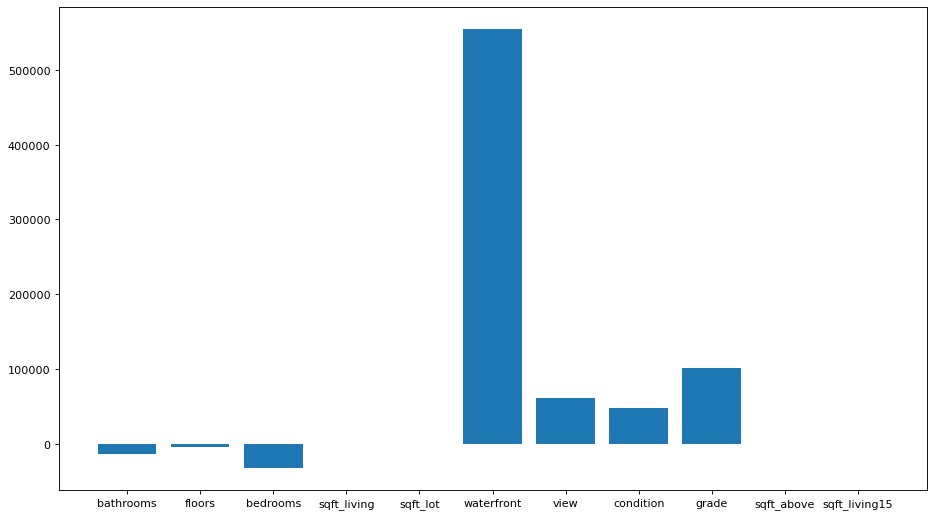

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8), dpi=80)
f = pd.DataFrame(feat_f,columns=['Features'])
Coef = pd.DataFrame(coef_val,columns=['Coefficients'])
featu= pd.concat([f,Coef],axis=1)
plt.bar(featu.Features,featu.Coefficients);

In [11]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(14, 8), dpi=80)
f = pd.DataFrame(feat_f,columns=['Features'])
Coef = pd.DataFrame(coef_val,columns=['Coefficients'])
d =pd.Series(coef_val,feat_f)
d

bathrooms        -13362.133434
floors            -4208.280208
bedrooms         -32816.732310
sqft_living         217.716180
sqft_lot             -0.328772
waterfront       554484.648906
view              61065.266494
condition         48224.796305
grade            100747.130378
sqft_above          -30.625346
sqft_living15         3.490586
dtype: float64

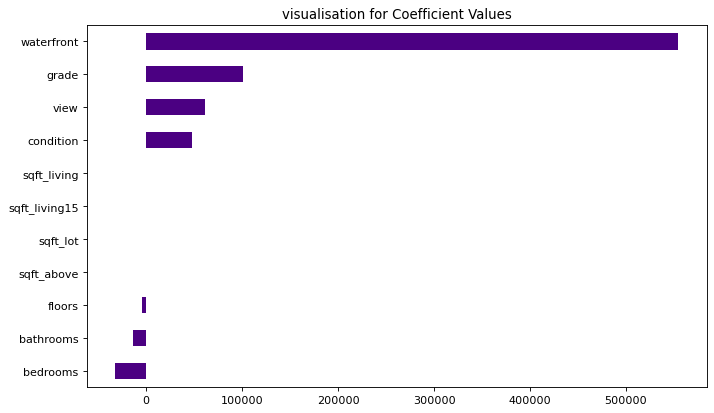

In [13]:
plt.figure(figsize=(10,6), dpi=80)
import matplotlib.pyplot as plt
d.sort_values().plot(kind="barh",color='indigo')
plt.title('visualisation for Coefficient Values');